In [218]:
import numpy as np
import matplotlib.pyplot as plt
from NumOpt.OptimizationProblem import OptimizationProblem
from NumOpt.post_processing import plot_histories

In [219]:
# problem parameters
rho = 0.55
v = 300
args = (rho, v)


In [220]:
def computeDragCoefficient(x, *args):
    l = x[0]
    d = x[1]
    rho = args[0]
    v = args[1]
    Cf = 0.0035
    Cd = Cf * (3 * (l/d) + 4.5 * (d/l)**0.5 + 21 * (d/l)**2)
    return Cd

def computeFrontalSurface(x, *args):
    l = x[0]
    d = x[1]
    e = np.sqrt(1 - (d/l)**2)
    S = np.pi/2 * d**2 * (1 + (l/(d*e)) * np.arcsin(e))
    return S

def computeDrag(x, *args):
    l = x[0]
    d = x[1]
    rho = args[0]
    v = args[1]
    Cd = computeDragCoefficient(x, *args)
    S = computeFrontalSurface(x, *args)
    return 0.5 * rho * v**2 * Cd * S

def computeVolume(x, *args):
    l = x[0]
    d = x[1]
    V = np.pi/6 * d**2 * l
    return V

def penalizedFunction(x, *args):
    xref = np.array([3.0, 1.0])
    dragRef = computeDrag(xref, *args)
    volumeRef = computeVolume(xref, *args)
    
    # objective function
    drag = computeDrag(x, *args) / dragRef
    
    # constraint
    volume = computeVolume(x, *args) / volumeRef
    minVolume = 2.5/volumeRef
    volumeConstraint = minVolume - volume
    
    # penalized function
    weight = 5
    return drag + weight * volumeConstraint**2

In [221]:
penalizedFunction((5, 1), *args)

np.float64(2.110169689814199)

In [222]:
# optimization hyperparameters
mu1 = 1e-4
mu2 = 0.01
tol = 1e-9
maxiter = 100
directionMethod = 'quasi_newton'
stepMethod = 'strong_wolfe'

# bounds
lmin, lmax = 2.2, 4
dmin, dmax = 0.5, 1.8
lguess, dguess = 0.5*(lmin+lmax), 0.5*(dmin+dmax)
initialGuess = np.array([lguess, dguess])

# optimization
prob = OptimizationProblem(nDim=2, bounds=[(lmin, lmax), (dmin, dmax)])
prob.setObjectiveFunction(penalizedFunction, *args)
history = prob.solve(x0=initialGuess, directionMethod=directionMethod, 
                        stepMethod=stepMethod, options={'maxiter':maxiter, 'tol':tol, 'mu1':mu1, 'mu2':mu2})

Final solution:
        l =  2.860531039938235
        d =  1.2699374255245508


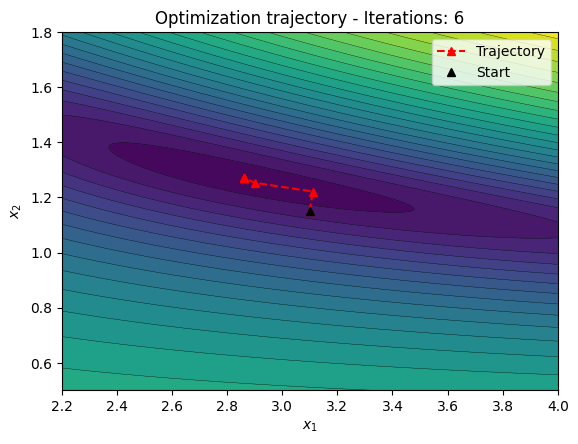

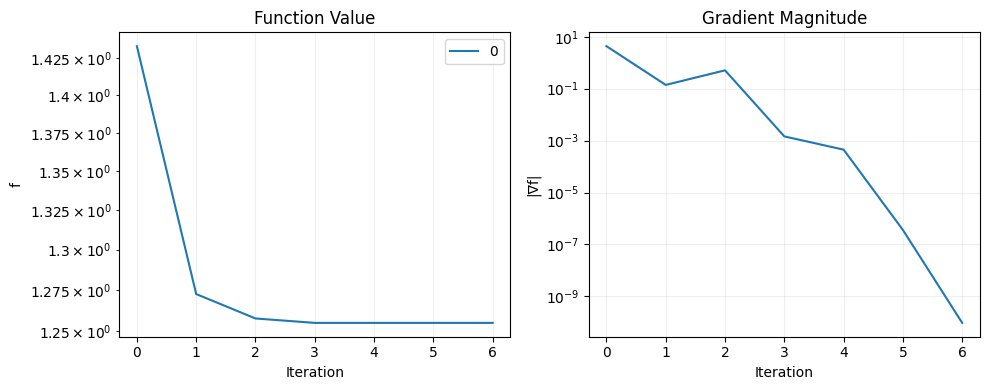

In [223]:
prob.plotSolutionHistory(history, logscale=True)
plot_histories([history], '0.1,0.1', xlog=(False, False), ylog=(True, True))
print('Final solution:')
print('        l = ', history['x'][-1][0])
print('        d = ', history['x'][-1][1])